In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud

In [5]:
# Load the dataset
file_path = "C:\\Users\\suman\\Downloads\\disney_plus_titles.csv"
df = pd.read_csv(file_path)

In [6]:
# Basic Data Information
print("Basic Information about the Dataset:")
print(df.info())

Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB
None


In [7]:
# Display first few records
print("\nFirst few records:")
print(df.head())


First few records:
  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...         

In [8]:
# Statistical Summary
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
       show_id   type          title     director            cast  \
count     1368   1368           1368          928            1194   
unique    1368      2           1368          578            1132   
top         s1  Movie  A Spark Story  Jack Hannah  Winston Hibler   
freq         1    991              1           17              10   
mean       NaN    NaN            NaN          NaN             NaN   
std        NaN    NaN            NaN          NaN             NaN   
min        NaN    NaN            NaN          NaN             NaN   
25%        NaN    NaN            NaN          NaN             NaN   
50%        NaN    NaN            NaN          NaN             NaN   
75%        NaN    NaN            NaN          NaN             NaN   
max        NaN    NaN            NaN          NaN             NaN   

              country         date_added  release_year rating  duration  \
count            1193               1365   1368.000000   1366      1368   

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64


In [18]:
df['director'] = df['director'].fillna('Unknown')


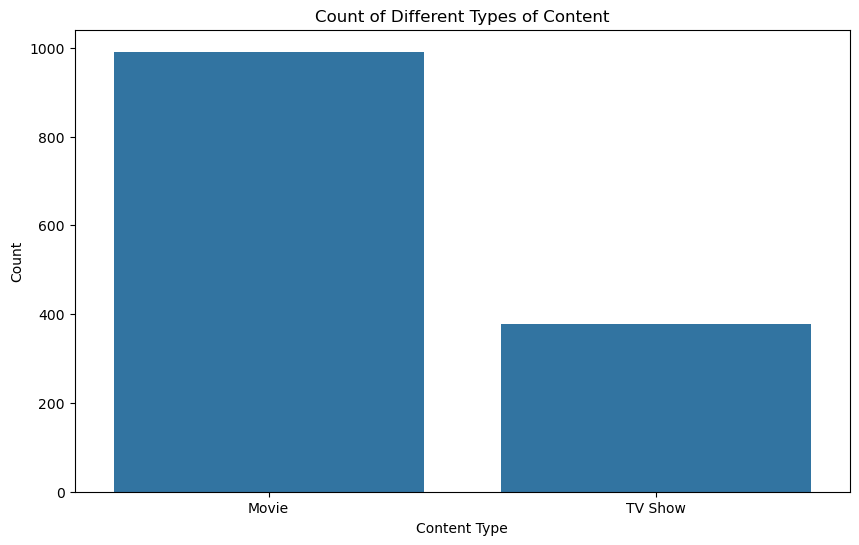

In [20]:
# Data Visualization - Count of different types of content
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=df)
plt.title('Count of Different Types of Content')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [21]:
# Time Series Analysis - Number of titles added over time
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

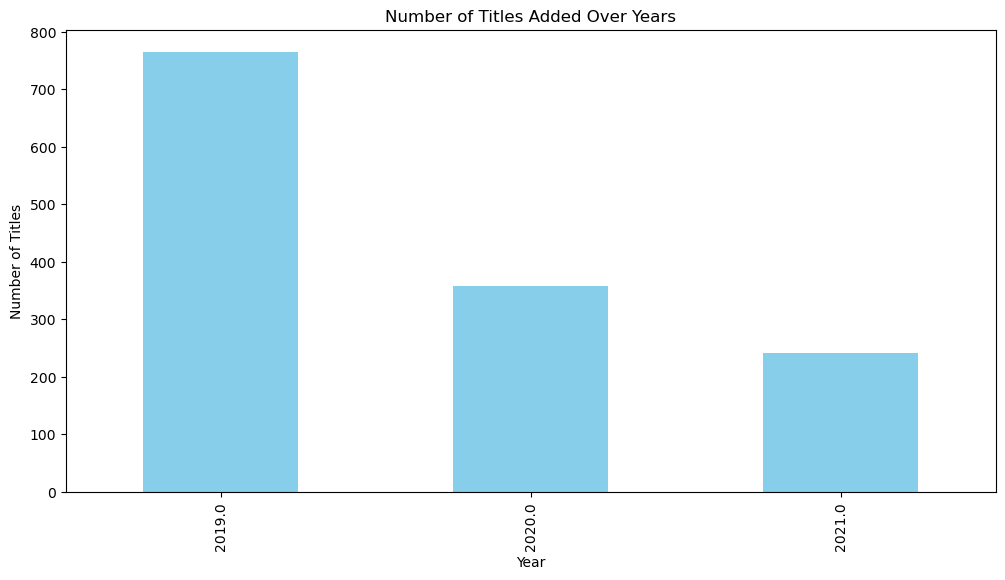

In [22]:
plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Titles Added Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [23]:
# Sentiment Analysis - WordCloud of Descriptions
text = " ".join(desc for desc in df['description'].dropna())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

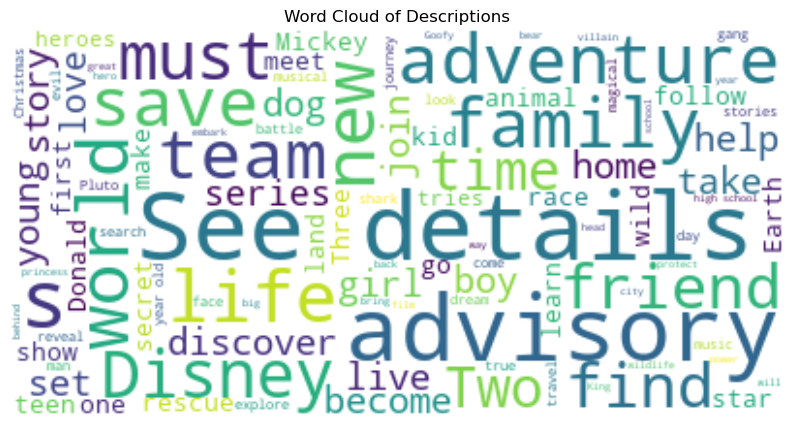

In [24]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.show()

In [25]:

# Clustering - TF-IDF Vectorization of Titles
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['title'])

In [26]:
# Applying KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=0)
df['cluster'] = kmeans.fit_predict(X)


In [27]:
# Reducing dimensions for visualization using PCA
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

In [28]:
colors = ["r", "b", "c", "y", "m"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]


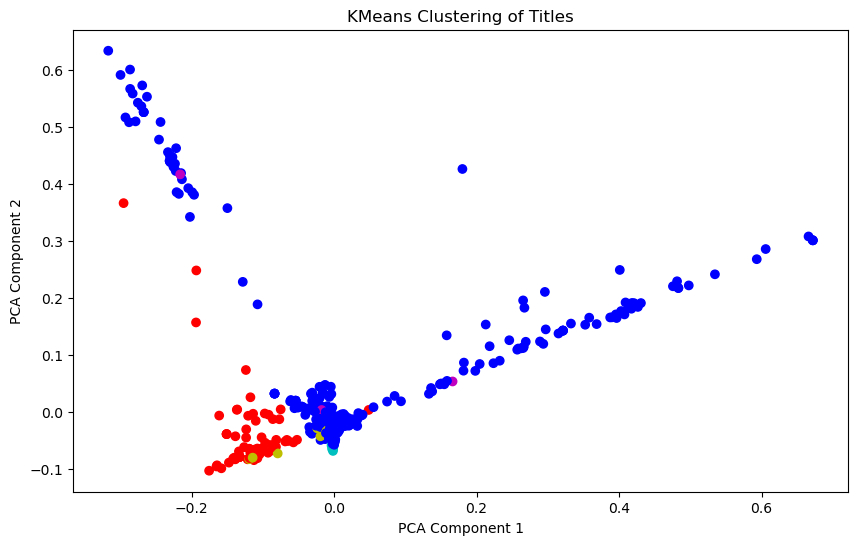

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in df['cluster']])
plt.title('KMeans Clustering of Titles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()